# Activity 1 Instructor Turn SQLAlchemy Joins
# Setup¶

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [2]:
engine = create_engine("sqlite:///./Resources/mammal_masses.sqlite", echo=False)

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['ea', 'na']

In [4]:
# Map Europe class
EA = Base.classes.ea

In [5]:
# Map North American class
NA = Base.classes.na

In [6]:
# create a session
session = Session(engine)

# Filtering Review
Filters are the "WHERE" clause for your select statement.

In [7]:
# filter North American mammals whose genus is "Antilocapra"
# query, loop over and print out animals.
mammals = session.query(NA).filter(NA.genus == 'Antilocapra').all()
for mammal in mammals:
    print("Family: {0}, Genus: {1}".format(mammal.family, mammal.genus))

Family: Antilocapridae, Genus: Antilocapra


# Joins
A SQL join combines columns from one or more tables in a relational database.

It creates a set that can be saved as a table or used as it is.

A JOIN is a means for combining columns from one (self-table) or more tables by using values common to each.

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['ea', 'na']

In [9]:
# Get a list of column names and types
columns = inspector.get_columns('ea')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
record_id INTEGER
continent TEXT
status TEXT
sporder TEXT
family TEXT
genus TEXT
species TEXT
log_mass_g FLOAT
comb_mass_g FLOAT
reference TEXT


In [10]:
session.query(EA.sporder, NA.sporder).limit(100).all()

[('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'Artiodactyla'),
 ('Artiodactyla', 'A

In [11]:
same_sporder = session.query(EA, NA).filter(EA.sporder == NA.sporder).limit(10).all()

for record in same_sporder:
    (ea, na) = record
    print(ea)
    print(na)

In [12]:
# Return all animals from EA and NA belonging to the same sporder.
# This JOINs the data in the two tables together into a single dataset (here in the form of a tuple).
# Note: We are going to limit the results to 10 for printing
sel = [EA.family, EA.genus, EA.species, NA.family, NA.genus, NA.species]
same_sporder = session.query(*sel).filter(EA.sporder == NA.sporder).limit(10).all()

for record in same_sporder:
    (ea_fam, ea_gen, ea_spec, na_fam, na_gen, na_spec) = record
    print(
        f"The European animal '{ea_fam} {ea_gen} {ea_spec}'"
        f"belongs to the same sporder as the North American animal '{na_fam} {na_gen} {na_spec}'.")

The European animal 'Bovidae Antilope cervicapra'belongs to the same sporder as the North American animal 'Antilocapridae Antilocapra americana'.
The European animal 'Bovidae Antilope cervicapra'belongs to the same sporder as the North American animal 'Antilocapridae Capromeryx mexicana'.
The European animal 'Bovidae Antilope cervicapra'belongs to the same sporder as the North American animal 'Antilocapridae Capromeryx minor'.
The European animal 'Bovidae Antilope cervicapra'belongs to the same sporder as the North American animal 'Antilocapridae Stockoceros conklingi'.
The European animal 'Bovidae Antilope cervicapra'belongs to the same sporder as the North American animal 'Antilocapridae Stockoceros onusrosagris'.
The European animal 'Bovidae Antilope cervicapra'belongs to the same sporder as the North American animal 'Antilocapridae Tetrameryx shuleri'.
The European animal 'Bovidae Antilope cervicapra'belongs to the same sporder as the North American animal 'Bovidae Bison bison'.
Th

# Instructor Turn Activity 2 Date


# SQLAlchemy, Sqlite, and Dates

# Setup

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [14]:
engine = create_engine("sqlite:///./Resources/dow.sqlite", echo=False)

# Explore Database

In [15]:
inspector = inspect(engine)
inspector.get_table_names()

['dow']

In [16]:
# Get a list of column names and types
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


In [17]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

# Reflect and query dates

In [18]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [19]:
session = Session(engine)

How many dates do we have?

In [20]:
# Total dates
session.query(func.count(Dow.date)).all() #func.count to get count

[(750)]

What is the earliest date?

In [21]:
# Earliest Date
session.query(Dow.date).order_by(Dow.date).first()

('2011-01-07')

What is the latest date?

In [22]:
#Latest Date
session.query(Dow.date).order_by(Dow.date.desc()).first()

('2011-06-24')

Find all of the dates great than 2011-03-01

In [23]:
session.query(Dow.date).\
    filter(Dow.date > '2011-03-01').\
    order_by(Dow.date).all()

[('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'

## Important Note! Sqlite does not support a date column type, but SQLAlchemy will allow you to work with dates in the iso format. sqlite dates
# Quick Review of DateTime

In [24]:
import datetime as dt

In [25]:
# Print a date object and a datetime object 
print(dt.date.today())
print(dt.date(2017, 1 ,31))

2018-07-07
2017-01-31


In [26]:
print(dt.datetime.utcnow())
print(dt.datetime(2017, 1, 31))

2018-07-07 17:45:27.080020
2017-01-31 00:00:00


In [27]:
# date 1 week ago from today
week_ago = dt.date.today() - dt.timedelta(days=7)
week_ago

datetime.date(2018, 6, 30)

Query for the Dow closing price 1 week before 2011-04-08 using the datetime library

In [28]:
# Query for the Dow closing price for `CSCO` 1 week before `2011-04-08` using the datetime library
query_date = dt.date(2011, 4, 8) - dt.timedelta(days=7)
print("Query Date: ", query_date)

Query Date:  2011-04-01


In [29]:
session.query(Dow.date, Dow.close_price).\
    filter(Dow.stock == 'CSCO').\
    filter(Dow.date == query_date).all()

[('2011-04-01', 17.04)]

In [30]:
# Parse out just the day from the datetime object
dt.date.today().strftime("%d")

'07'

Putting it all together

In [31]:
# Query for all dates matching the following date string in the format `%d`
date_str = "14"
session.query(Dow.date).\
    filter(func.strftime("%d", Dow.date) == date_str).all()

[('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14')]

# Students Turn Activity 2


# Instructions

* Use the dow.sqlite dataset provided to analyze the average stock prices (average open, average high, average low, average close) for all stocks in the Month of May

* Plot the results as a Pandas or Matplotlib Bar Chart

### Bonus

Calculate the high-low peak-to-peak (PTP) values for `IBM` stock after `2011-05-31`.

* Note: high-low PTP is calculated using `high_price` - `low_price`
* Use a DateTime.date object in the query filter
* Use a list comprehension or NumPy's ravel method to unpack the query's list of tuples into a list of PTP values.
* Use matplotlib to plot the PTP values as a boxplot

# Setup

In [32]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import pandas as pd

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [35]:
engine = create_engine("sqlite:///./Resources/dow.sqlite", echo=False)

In [36]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

In [37]:
inspector = inspect(engine)
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


In [38]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [39]:
session = Session(engine)

# Analysis
Analyze the Average prices (open, high, low, close) for all stocks in the Month of May

In [40]:
# Query for the stock and average prices (open, high, low, close) for all stock in the month of May
# Sort the result by stock name

sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.round(func.avg(Dow.close_price),2)]

may_averages = session.query(*sel).\
    filter(func.strftime("%m", Dow.date) == "05").\
    group_by(Dow.stock).\
    order_by(Dow.stock).all()

may_averages

[('AA', 16.8475, 17.3375, 16.4175, 16.75),
 ('AXP', 49.89750000000001, 51.07, 49.315, 50.5),
 ('BA', 78.7175, 79.2175, 76.8825, 78.21),
 ('BAC', 12.0, 12.235, 11.7325, 11.88),
 ('CAT', 108.5525, 110.5975, 104.045, 106.4),
 ('CSCO', 17.067500000000003, 17.255000000000003, 16.5925, 16.86),
 ('CVX', 103.9725, 105.72749999999999, 100.4575, 102.76),
 ('DD', 53.9625, 54.9225, 52.14, 53.21),
 ('DIS', 42.3, 42.8175, 41.11749999999999, 41.9),
 ('GE', 19.96, 20.175, 19.4875, 19.74),
 ('HD', 36.765, 37.51, 36.504999999999995, 36.76),
 ('HPQ', 39.315, 40.14, 37.8425, 38.54),
 ('IBM', 169.7025, 171.58, 166.9375, 169.12),
 ('INTC', 23.0975, 23.67, 22.652500000000003, 23.02),
 ('JNJ', 65.6575, 66.8475, 65.0575, 66.09),
 ('JPM', 44.015, 44.709999999999994, 43.019999999999996, 43.53),
 ('KO', 67.5775, 68.32499999999999, 66.75750000000001, 67.47),
 ('KRFT', 34.305, 35.0225, 33.945, 34.74),
 ('MCD', 79.95750000000001, 81.5525, 79.8025, 80.85),
 ('MMM', 95.17750000000001, 96.20750000000001, 93.2425, 94.66

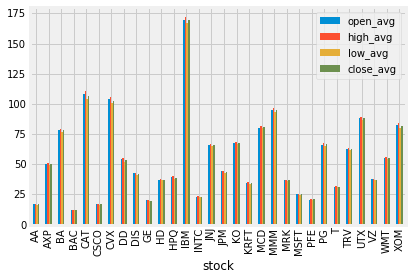

In [41]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(may_averages, columns = ["stock", "open_avg", "high_avg", "low_avg", "close_avg"])
df.set_index("stock", inplace=True)
df.plot.bar()

plt.show()

Bonus
Calculate the high-low peak-to-peak (PTP) values for IBM stock after 2011-05-31.

Note: high-low PTP is calculated using high_price - low_price
Use a DateTime.date object in the query filter
Use a list comprehension or numpy's ravel method to unpack the query's list of tuples into a list of PTP values.
Use matplotlib to plot the PTP values as a boxplot

[(5.759999999999991,), (3.0900000000000034,), (3.579999999999984,), (3.219999999999999,)]
[5.76 3.09 3.58 3.22]


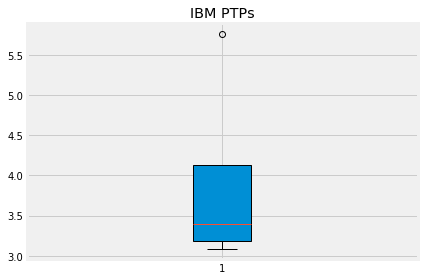

In [42]:
# Design a query to calculate the PTP for stock `IBM` after May, 2011
import datetime as dt
import numpy as np

date = dt.datetime(2011, 5, 31)
results = session.query(Dow.high_price - Dow.low_price).\
    filter(Dow.date > date).filter(Dow.stock == "IBM").all()
print(results)

#np.ravel will flatten the data meaning [(1), (2)] = [1,2]
print(np.ravel(results))
ptps = list(np.ravel(results))
#OR
#ptps = [reluts[0] for result in results]

fig, ax = plt.subplots()
x = range(len(ptps))
ax.boxplot(ptps, patch_artist=True)
ax.set_title("IBM PTPs")
fig.tight_layout()
plt.show()

In [ ]:
# Load the query into a dataframe, set the index to the date, and plot the ptps


# Activity 4 Instructor Turn

In [43]:
!pip install flask

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [44]:
# 1. import Flask
from flask import Flask

# 2. Create an app, being sure to pass __name__
app = Flask(__name__)


# 3. Define what to do when a user hits the index route
@app.route("/")
def home():
    print("Server received request for 'Home' page...")
    return "Welcome to my 'Home' page!"


# 4. Define what to do when a user hits the /about route
@app.route("/about")
def about():
    print("Server received request for 'About' page...")
    return "Welcome to my 'About' page!"


if __name__ == "__main__":
    app.run(debug=True)

 * Restarting with stat


SystemExit: 1

C:\Users\Laura\Anaconda3.1\lib\site-packages\IPython\core\interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Students Turn Activity 5 Hello, Web

This activity allows students to practice setting up a server and defining basic routes with Flask.

## Instructions

* Create an `app.py`, and make the necessary imports.

* Use Flask to create an `app` instance.

* Use route decorators to define the following endpoints:

  * `/`, or your **index route**: This should return a simple string, such as `"Hello, world!"`, or `"Welcome to my API!"`

  * `/about`, which should return a string containing your **name** and **current location**.

  * `/contact`, which should return a string telling visitors where to email you.

* Finally, add code at the bottom of the file that allows you to run the server from the command line with: `python app.py`.

## Hints

* Refer to the [Flask documentation](http://flask.pocoo.org/docs/0.12/quickstart/#a-minimal-application) as you work through this activity.

# Instructor Turn Activity 6 

In [ ]:
from flask import Flask, jsonify


app = Flask(__name__)

hello_dict = {"Hello": "World!"}


@app.route("/")
def home():
    return "Hi"


@app.route("/normal")
def normal():
    return hello_dict


@app.route("/jsonified")
def jsonified():
    return jsonify(hello_dict)


if __name__ == "__main__":
    app.run(debug=True)

# Students Turn Activity 7 Justice League API

* In this activity, you will create an API route that returns the superhero name and real name for every member of the DC Comics Justice League.

## Instructions

* Create a file called `app.py` for your Flask app.

* Define a Python dictionary containing the superhero name and real name for each member of the DC Comics Justice League (Superman, Batman, Wonder Woman, Green Lantern, Flash, Aquaman, and Cyborg).

  * You can gather that information here: [Justice League](https://en.wikipedia.org/wiki/Justice_League)

  * Only gather the information for the 7 characters listed above.

* Create a **GET** route called `/api/v1.0/justice-league`.

  * Inside of your GET route, create a function called `justice_league` that will use `jsonify` to convert the dictionary of Justice League members to a JSON object and return that data as a request.

* Define a root route `/` that will return the usage statement for your API.

- - -


# Instructor Turn Activity 8 

In [ ]:
from flask import Flask, jsonify

justice_league_members = [
    {"superhero": "Aquaman", "real_name": "Arthur Curry"},
    {"superhero": "Batman", "real_name": "Bruce Wayne"},
    {"superhero": "Cyborg", "real_name": "Victor Stone"},
    {"superhero": "Flash", "real_name": "Barry Allen"},
    {"superhero": "Green Lantern", "real_name": "Hal Jordan"},
    {"superhero": "Superman", "real_name": "Clark Kent/Kal-El"},
    {"superhero": "Wonder Woman", "real_name": "Princess Diana"}
]

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/api/v1.0/justice-league")
def justice_league():
    """Return the justice league data as json"""

    return jsonify(justice_league_members)


@app.route("/")
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league<br/>"
        f"/api/v1.0/justice-league/Arthur%20Curry<br/>"
        f"/api/v1.0/justice-league/Bruce%20Wayne<br/>"
        f"/api/v1.0/justice-league/Victor%20Stone<br/>"
        f"/api/v1.0/justice-league/Barry%20Allen<br/>"
        f"/api/v1.0/justice-league/Hal%20Jordan<br/>"
        f"/api/v1.0/justice-league/Clark%20Kent/Kal-El<br/>"
        f"/api/v1.0/justice-league/Princess%20Diana"
    )


@app.route("/api/v1.0/justice-league/<real_name>")
def justice_league_character(real_name):
    """Fetch the Justice League character whose real_name matches
       the path variable supplied by the user, or a 404 if not."""

    canonicalized = real_name.replace(" ", "").lower()
    for character in justice_league_members:
        search_term = character["real_name"].replace(" ", "").lower()

        if search_term == canonicalized:
            return jsonify(character)

    return jsonify({"error": f"Character with real_name {real_name} not found."}), 404


if __name__ == "__main__":
    app.run(debug=True)

# Students Turn Activity 9
# Justice League API - Continued

* In this activity, you will add an additional API route that returns json for a Python Dictionary containing superhero
* /api/v1.0/justice-league/superhero/<theirname>

## Instructions

* Using the last activity as a starting point, add code to allow for getting a specific hero's information based on their superhero name.

- - -

# Instructor Turn Activity 10


In [ ]:
import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify


#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///titanic.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table
Passenger = Base.classes.passenger

# Create our session (link) from Python to the DB
session = Session(engine)

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
            "Available Routes:<br/>"
            "/api/v1.0/names<br/>"
            "/api/v1.0/passengers"
            )


@app.route("/api/v1.0/names")
def names():
    """Return a list of all passenger names"""
    # Query all passengers
    results = session.query(Passenger.name).all()
    
    # Convert list of tuples into normal list
    all_names = list(np.ravel(results))
    
    return jsonify(all_names)


@app.route("/api/v1.0/passengers")
def passengers():
    """Return a list of passenger data including the name, age, and sex of each passenger"""
    # Query all passengers
    results = session.query(Passenger).all()
    
    # Create a dictionary from the row data and append to a list of all_passengers
    all_passengers = []
    for passenger in results:
        passenger_dict = {}
        passenger_dict["name"] = passenger.name
        passenger_dict["age"] = passenger.age
        passenger_dict["sex"] = passenger.sex
        all_passengers.append(passenger_dict)
    
    return jsonify(all_passengers)


if __name__ == '__main__':
    app.run(debug=True)


# Students Turn Activity 11
# Chinook Database Analysis

* In this activity, you will complete some exploratory analysis of the [chinook](https://chinookdatabase.codeplex.com/wikipage?title=Chinook_Schema&referringTitle=Home) database.

## Instructions

* Create a Jupyter Notebook for your analysis.

* Create a SQLAlchemy engine to the database `chinook.sqlite`.

* Use `automap_base` to reflect the database tables.

* Create references to the `invoices` and `invoice_items` tables called `Invoices` and `Items`.

* Create a SQLALchemy ORM session object.

* Design a query that lists all of the billing countries found in the invoices table.

* Design a query that lists the invoices totals for each billing country and sort the output in descending order.

  * The results tuple should contain the country name and the invoice total for that country using all records in the invoices table.

* Design a query that lists all of the Billing Postal Codes for the USA.

* Calculate the Item Totals **sum(UnitPrice \* Quantity)** for the USA.

  * Return the value as a scalar floating point number.

* Calculate the invoice items totals **sum(UnitPrice \* Quantity)** for each Billing Postal Code for the USA.

In [45]:
# Ignore SQLITE warnings related to Decimal numbers in the Chinook database
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Import Dependencies
import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

In [57]:
# Create an engine for the chinook.sqlite database
engine = create_engine("sqlite:///./Resources/chinook.sqlite", echo=False)

In [60]:
# Reflect Database into ORM classes
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['albums',
 'artists',
 'customers',
 'employees',
 'genres',
 'invoice_items',
 'invoices',
 'tracks',
 'media_types',
 'playlists']

In [61]:
# Save a reference to the invoices table as `Invoices`
Invoices = Base.classes.invoices

In [62]:
# Create a database session object
session = Session(engine)

In [73]:
# List all of the countries found in the invoices table
session.query(Invoices.BillingCountry).group_by(Invoices.BillingCountry).all()

[('Argentina'),
 ('Australia'),
 ('Austria'),
 ('Belgium'),
 ('Brazil'),
 ('Canada'),
 ('Chile'),
 ('Czech Republic'),
 ('Denmark'),
 ('Finland'),
 ('France'),
 ('Germany'),
 ('Hungary'),
 ('India'),
 ('Ireland'),
 ('Italy'),
 ('Netherlands'),
 ('Norway'),
 ('Poland'),
 ('Portugal'),
 ('Spain'),
 ('Sweden'),
 ('USA'),
 ('United Kingdom')]

In [77]:
# Design a query that lists the invoices totals for each billing country 
# and sort the output in descending order.
session.query(Invoices.BillingCountry, func.sum(Invoices.Total)).\
    group_by(Invoices.BillingCountry).\
    order_by(func.sum(Invoices.Total)).all()

[('Belgium', Decimal('37.62')),
 ('Spain', Decimal('37.62')),
 ('Argentina', Decimal('37.62')),
 ('Australia', Decimal('37.62')),
 ('Denmark', Decimal('37.62')),
 ('Italy', Decimal('37.62')),
 ('Poland', Decimal('37.62')),
 ('Sweden', Decimal('38.62')),
 ('Norway', Decimal('39.62')),
 ('Netherlands', Decimal('40.62')),
 ('Finland', Decimal('41.62')),
 ('Austria', Decimal('42.62')),
 ('Hungary', Decimal('45.62')),
 ('Ireland', Decimal('45.62')),
 ('Chile', Decimal('46.62')),
 ('India', Decimal('75.26')),
 ('Portugal', Decimal('77.24')),
 ('Czech Republic', Decimal('90.24')),
 ('United Kingdom', Decimal('112.86')),
 ('Germany', Decimal('156.48')),
 ('Brazil', Decimal('190.10')),
 ('France', Decimal('195.10')),
 ('Canada', Decimal('303.96')),
 ('USA', Decimal('523.06'))]

In [80]:
# Save a reference to the invoice_items table as `Items`
Items = Base.classes.invoice_items

In [82]:
# List all of the Billing Postal Codes for the USA.
session.query(Invoices.BillingPostalCode).\
    filter(Invoices.BillingCountry == "USA").group_by(Invoices.BillingPostalCode).all()

[('10012-2612'),
 ('2113'),
 ('32801'),
 ('53703'),
 ('60611'),
 ('76110'),
 ('84102'),
 ('85719'),
 ('89503'),
 ('94040-111'),
 ('94043-1351'),
 ('95014'),
 ('98052-8300')]

In [83]:
# Calculate the Item Totals (sum(UnitPrice * Quantity)) for the USA
session.query(func.sum(Items.UnitPrice * Items.Quantity)).\
    filter(Invoices.InvoiceId == Items.InvoiceId).\
    filter(Invoices.BillingCountry == "USA").scalar() #scalar returns first column of row

Decimal('523.0600000000')

In [89]:
# Calculate the Item Totals `sum(UnitPrice * Quantity)` for each Billing Postal Code in the USA
# Sort the results in descending order by Total
session.query(Invoices.BillingPostalCode, func.sum(Items.UnitPrice * Items.Quantity)).\
    filter(Invoices.InvoiceId == Items.InvoiceId).\
    filter(Invoices.BillingCountry == "USA").\
    group_by(Invoices.BillingPostalCode).\
    order_by(func.sum(Items.UnitPrice * Items.Quantity).desc()).all()

[('76110', Decimal('47.6200000000')),
 ('60611', Decimal('43.6200000000')),
 ('84102', Decimal('43.6200000000')),
 ('53703', Decimal('42.6200000000')),
 ('94040-111', Decimal('39.6200000000')),
 ('32801', Decimal('39.6200000000')),
 ('98052-8300', Decimal('39.6200000000')),
 ('95014', Decimal('38.6200000000')),
 ('10012-2612', Decimal('37.6200000000')),
 ('2113', Decimal('37.6200000000')),
 ('85719', Decimal('37.6200000000')),
 ('89503', Decimal('37.6200000000')),
 ('94043-1351', Decimal('37.6200000000'))]